## Evolution of Gradient Descent
_Yoav Rabinovich_

Visualization code from http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

#### Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

#### Graphing and Animation functions

In [0]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [0]:
def definegrid(xmin,xmax,xstep,ymin,ymax,ystep):
    xmin, xmax, xstep = -4, 4, .1
    ymin, ymax, ystep = -4, 4, .1
    x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
    z = f(x, y)
    return x,y,z

# def graph3D(xmin=-4,xmax=4,xstep=.1,ymin=-4,ymax=4,ystep=.1):
#     x,y,z = definegrid(xmin,xmax,xstep,ymin,ymax,ystep)
#     fig = plt.figure(figsize=(8, 5))
#     ax = plt.axes(projection='3d', elev=50, azim=-50)

#     ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
#                     edgecolor='none', alpha=.8, cmap=plt.cm.jet)

#     ax.set_xlabel('$x$')
#     ax.set_ylabel('$y$')
#     ax.set_zlabel('$z$')

#     ax.set_xlim((xmin, xmax))
#     ax.set_ylim((ymin, ymax))
#     return fig,ax

def graph2D(xmin=-4,xmax=4,xstep=.1,ymin=-4,ymax=4,ystep=.1):
    x,y,z = definegrid(xmin,xmax,xstep,ymin,ymax,ystep)
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    
    return fig,ax

#### Objective Function

In [0]:
# Returns the evaluation of the objective function of interest at (x,y)
def f(x, y):
    #return (-2 * np.exp(-((x - 1) * (x - 1) + y * y) / .2) + -3 * np.exp(-((x + 1) * (x + 1) + y * y) / .2) + x * x + y * y)+2
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Returns gradient of f at (x, y)
def grad_f(x,y,h=1e-6):
    grad_x = (f(x + h, y) - f(x, y)) / h
    grad_y = (f(x, y + h) - f(x, y)) / h
    return [grad_x, grad_y]


In [0]:
# Checking with correct minimum
minimum = np.array([3.,0.5])
print(f(*minimum))
print(grad_f(*minimum))

0.0
[1.5781250004411744e-06, 2.3062538250218014e-05]


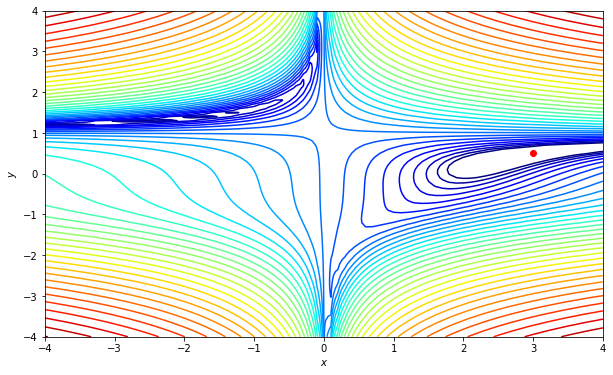

In [0]:
# Graphing
fig,ax = graph2D()
ax.plot(*minimum,"ro")
plt.show(fig,ax)

#### Stochastic Gradient Descent

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x})$$


In [0]:
# Perform gradient descent from x0 on f, and return the path taken
def sgd(x0, learning_rate, num_steps):
    path = np.array([x0])
    #?

    return path

#### Momentum

$$\begin{aligned}
\mathbf{v}_t &\leftarrow \gamma \mathbf{v}_{t-1} + \eta_t \mathbf{g}_t, \\
\mathbf{x}_t &\leftarrow \mathbf{x}_{t-1} - \mathbf{v}_t,
\end{aligned}
$$

In [0]:
# Perform gradient descent from x0 on f, and return the path taken
def momentum(x0, learning_rate, num_steps, gamma=0.9):
    path = np.array([x0])
    #?

    return path

#### RMSProp

$$\boldsymbol{v}_t \leftarrow \beta_1 \boldsymbol{v}_{t-1} + (1 - \beta_1) \boldsymbol{g}_t$$
$$\boldsymbol{s}_t \leftarrow \beta_2 \boldsymbol{s}_{t-1} + (1 - \beta_2) \boldsymbol{g}_t \odot \boldsymbol{g}_t$$

In [0]:
# Perform gradient descent from x0 on f, and return the path taken
def rmsprop(x0, learning_rate, num_steps, decay_rate=0.99,epsilon=1e-6):
    path = np.array([x0])
    #?

    return path 

#### Adam

$$\boldsymbol{v}_t \leftarrow \beta_1 \boldsymbol{v}_{t-1} + (1 - \beta_1) \boldsymbol{g}_t$$
$$\boldsymbol{s}_t \leftarrow \beta_2 \boldsymbol{s}_{t-1} + (1 - \beta_2) \boldsymbol{g}_t \odot \boldsymbol{g}_t$$
$$\hat{\boldsymbol{v}}_t \leftarrow \frac{\boldsymbol{v}_t}{1 - \beta_1^t}$$
$$\hat{\boldsymbol{s}}_t \leftarrow \frac{\boldsymbol{s}_t}{1 - \beta_2^t}$$
$$\boldsymbol{g}_t' \leftarrow \frac{\eta \hat{\boldsymbol{v}}_t}{\sqrt{\hat{\boldsymbol{s}}_t} + \epsilon}$$
$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}_t'$$


In [0]:
# Perform gradient descent from x0 on f, and return the path taken
def adam(x0, learning_rate, num_steps,b_1=0.5,b_2=0.9,epsilon=1e-6):
    path = np.array([x0])
    #?

    return path

#### Optimize and Visualize

In [0]:
# Set optimization function
optimizer = rmsprop
# Setting starting position
x0 = np.array([2.,3.])
# Perform SGD1
path = optimizer(x0,1e-2,500).T

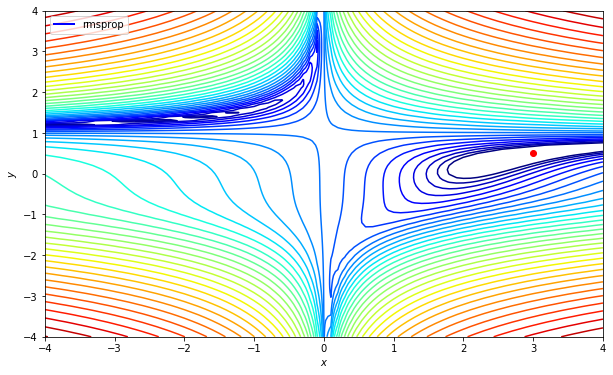

In [0]:
# Define animation objects graph
fig,ax = graph2D()
line, = ax.plot([], [], 'b', label=optimizer.__name__, lw=2)
point, = ax.plot([], [], 'bo')
ax.plot(*minimum,"ro")
ax.legend(loc='upper left')

In [0]:
# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=20, 
                               repeat_delay=5, blit=True)
HTML(anim.to_html5_video())

### Solutions

#### Momentum

In [0]:
# Perform gradient descent from x0 on f, and return the path taken
def momentum(x0, learning_rate, num_steps, gamma=0.9):
    path = np.array([x0])
    #?
    gradient = np.zeros((1,2))
    v = np.zeros((1,2))
    for i in range(num_steps):
        gradient = grad_f(*x0)
        v = np.multiply(v, initial_momentum) - np.multiply(gradient,learning_rate)
        x1 = (x0 + v).flatten()
        path = np.vstack([path, x1])
        x0 = x1

    return path

#### RMSProp

In [0]:
# Perform gradient descent from x0 on f, and return the path taken
def rmsprop(x0, learning_rate, num_steps, decay_rate=0.99,epsilon=1e-6):
    path = np.array([x0])
    #?
    gradient = np.zeros((1,2))
    c = np.zeros((1,2))
    eps = np.array([epsilon,epsilon])
    for i in range(num_steps):
        gradient = grad_f(*x0)
        c = np.multiply(c, decay_rate) + np.multiply(np.square(gradient),(1-decay_rate))
        x1 = (x0 - np.multiply(np.divide(gradient,np.add(np.sqrt(c),eps)),learning_rate)).flatten()
        path = np.vstack([path, x1])
        x0 = x1

    return path

#### Adam

In [0]:
# Perform gradient descent from x0 on f, and return the path taken
def adam(x0, learning_rate, num_steps,b_1=0.5,b_2=0.9,epsilon=1e-6):
    path = np.array([x0])
    #?
    gradient = np.zeros((1,2))
    m = np.zeros((1,2))
    v = np.zeros((1,2))
    eps = np.array([epsilon,epsilon])
    for i in range(num_steps):
        gradient = grad_f(*x0)
        m = np.multiply(m, b_1) + np.multiply(gradient,(1-b_1))
        v = np.multiply(v, b_2) + np.multiply(np.square(gradient),(1-b_2))
        m_hat = np.divide(m,(1-b_1^i))
        v_hat = np.divide(v,(1-b_2^i))
        x1 = (x0 - np.multiply(np.divide(m,np.add(np.sqrt(v),eps)),learning_rate)).flatten()
        path = np.vstack([path, x1])
        x0 = x1
    return path